In [1]:
import os
import sys
import json
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.metrics import accuracy_score
from gensim.models import Word2Vec
import time

I:\anaconda1\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
''''''
''''''

def cm2pr_binary(cm):
    p = cm[0,0]/np.sum(cm[:,0])
    r = cm[0,0]/np.sum(cm[0])
    return (p, r)

''''''
''''''
def PR(tp, fp, fn):
    P = float(tp)/(tp + fp)
    R = float(tp)/(tp + fn)
    return (P, R)

In [61]:
count = 0
for i in os.listdir('../data/clean_data/full_sentence/') :
    a = json.load(open('../data/clean_data/full_sentence/%s'%i))
    count+= (len(a)- a.count([]))

In [60]:
count

8194714

In [62]:
count

9478121

In [67]:
count_1 = 0
count_2 = 0
count_3 = 0
count_4 = 0
for i in os.listdir('../data/clean_data/only_entity//') :
    a = json.load(open('../data/clean_data/only_entity/%s'%i))
    count_1+= len([x for x in a if len(x) == 1 ])
    count_2+= len([x for x in a if len(x) == 2 ])
    count_3+= len([x for x in a if len(x) == 3 ])
    count_4+= len([x for x in a if len(x) > 3 ])
###
print('%s\n%s\n%s\n%s'%(count_1,count_2,count_3,count_4))

1497475
1563225
13480483785966


In [73]:
count_1 = 0
count_2 = 0
count_3 = 0
count_4 = 0
for i in os.listdir('../data/clean_data/without_adjective/') :
    a = json.load(open('../data/clean_data/without_adjective/%s'%i))
    count_1+= len([x for x in a if len(x) == 1 ])
    count_2+= len([x for x in a if len(x) == 2 ])
    count_3+= len([x for x in a if len(x) == 3 ])
    count_4+= len([x for x in a if len(x) > 3 ])
###
print('%s\n%s\n%s\n%s'%(count_1,count_2,count_3,count_4))

217658
102868
132494
9021845


In [2]:
###### Import ref without effect
ref = json.load(open('..//data/preprocessing/standard_ref/standard_ref_without_effect.json'))
entity = open('..//data/clean_data/entity_replaced.csv').read().split('\n')[:-1]

In [3]:
###### Entity dict 
entity_dict = {}
for row in entity :
    entity_dict[row.split('\t')[1]] = row.split('\t')[0]

In [53]:
count = 0
for drug in drug_herb_dict :
    for herb in drug_herb_dict[drug] :
        count+=1
print(count)

249


In [4]:
###### Ref pair drug - herb
drug_herb_dict = {}
for herb in ref :
    for drug in ref[herb] :
        try :
            if entity_dict[drug] not in drug_herb_dict :
                drug_herb_dict[entity_dict[drug]] = [entity_dict[herb]]
            else :
                drug_herb_dict[entity_dict[drug]].append(entity_dict[herb])
        except :
            pass

In [5]:
###### Ref pair herb - drug 
herb_drug_dict = {}
for herb in ref :
    for drug in ref[herb] :
        try :
            if entity_dict[herb] not in herb_drug_dict :
                herb_drug_dict[entity_dict[herb]] = [entity_dict[drug]]
            else :
                herb_drug_dict[entity_dict[herb]].append(entity_dict[drug])
        except :
            pass

In [45]:
full = {'ERR': [0.49422730642940366, 0.4956973293768546, 0.49654874892148404, 0.4949664429530201, 0.5135135135135135, 0.5222222222222223], 'precis': [0.5058262711864406, 0.5044523597506678, 0.5043215211754538, 0.5084459459459459, 0.5294117647058824, 0.5119047619047619], 'recal': [0.5057726935705963, 0.5043026706231454, 0.503451251078516, 0.5050335570469798, 0.4864864864864865, 0.4777777777777778], 'F': [0.505799480959695, 0.5043775040807242, 0.5038860103626943, 0.5067340067340067, 0.5070422535211269, 0.49425287356321834]}

only_entity = {'ERR': [0.4904996481351161, 0.483695652173913, 0.48158640226628896, 0.4810924369747899, 0.4766536964980545, 0.4782608695652174], 'precis': [0.5098591549295775, 0.5185589519650655, 0.5228571428571429, 0.5300429184549357, 0.5295275590551181, 0.5309734513274337], 'recal': [0.5095003518648838, 0.5163043478260869, 0.5184135977337111, 0.5189075630252101, 0.5233463035019456, 0.5217391304347826], 'F': [0.509679690249912, 0.5174291938997821, 0.5206258890469417, 0.524416135881104, 0.5264187866927593, 0.5263157894736842]}

only_noun = {'ERR': [0.4944306930693069, 0.4936708860759494, 0.493431855500821, 0.4864864864864865, 0.4888392857142857, 0.4957627118644068], 'precis': [0.5056475321058332, 0.5070842654735273, 0.509075907590759, 0.5277777777777778, 0.5180995475113123, 0.5219298245614035], 'recal': [0.505569306930693, 0.5063291139240507, 0.506568144499179, 0.5135135135135135, 0.5111607142857143, 0.5042372881355932], 'F': [0.5056084164926125, 0.5067064083457526, 0.5078189300411522, 0.5205479452054794, 0.5146067415730338, 0.5129310344827586]}

without_adj = {'ERR': [0.4943487018800358, 0.4951893234016139, 0.4965811965811966, 0.4977324263038549, 0.5, 0.5714285714285714], 'precis': [0.5057078903189703, 0.5049674014281279, 0.5042808219178082, 0.5057077625570776, 0.5227272727272727, 0.5], 'recal': [0.5056512981199642, 0.5048106765983861, 0.5034188034188034, 0.5022675736961452, 0.5, 0.42857142857142855], 'F': [0.5056795926361144, 0.5048890268508458, 0.5038494439692045, 0.503981797497156, 0.5111111111111111, 0.4615384615384615]}




In [51]:
print( 'full - F  ' + str(max(full['F'])) )
print( 'only_entity - F  ' + str(max(only_entity['F'])) )
print( 'only_noun - F  ' + str(max(only_noun['F'])) )
print( 'without_adj - F  ' + str(max(without_adj['F']) ))

full - F  0.5070422535211269
only_entity - F  0.5264187866927593
only_noun - F  0.5205479452054794
without_adj - F  0.5111111111111111


In [2]:
path = '..//data/model/only_noun/300/model'
model = Word2Vec.load(path)

In [37]:
evaluate(model,herb_drug_dict,drug_herb_dict,coor_y)

drug_entity_463
herb_entity_2736
drug_entity_1520
herb_entity_2736
drug_entity_345
herb_entity_2741
drug_entity_424
herb_entity_2496
drug_entity_793
herb_entity_2496
drug_entity_510
herb_entity_2496
drug_entity_378
herb_entity_2496
drug_entity_1097
herb_entity_2752
drug_entity_273
herb_entity_2752
drug_entity_970
herb_entity_2752
drug_entity_355
herb_entity_2752
drug_entity_882
herb_entity_2734
drug_entity_765
herb_entity_2734
drug_entity_333
herb_entity_2734
drug_entity_5514
herb_entity_2734
drug_entity_690
herb_entity_2734
drug_entity_5329
herb_entity_2734
drug_entity_1034
herb_entity_2755
18
1888


TypeError: list indices must be integers or slices, not str

In [3]:
model.wv.most_similar(positive=['herb_entity_2734','trigger_entity']) 

[('john´s', 0.6983307600021362),
 ('herb–drug', 0.6652954816818237),
 ('immune-suppressants', 0.6625698804855347),
 ('s.nowadays', 0.6614799499511719),
 ('pharmacologies', 0.6605209112167358),
 ('events.19', 0.65882408618927),
 ('s.100', 0.6571766138076782),
 ('medicines.we', 0.6521384716033936),
 ('androgenic', 0.6518225073814392),
 ('drugs.many', 0.6508476138114929)]

In [45]:
model.wv.most_similar(positive=['herb_entity_2496','trigger_entity'],topn = 10)

[('cardiotonics', 0.6780471205711365),
 ('l-thyroxin', 0.6639195680618286),
 ('.diure', 0.6637479066848755),
 ('-ii-receptor', 0.66225266456604),
 ('triple-therapy', 0.6602212190628052),
 ('spirolactones', 0.6597456932067871),
 ('antitarget', 0.6596860289573669),
 ('α-antagonists', 0.6577006578445435),
 ('ace-i', 0.6530631184577942),
 ('immune-suppressants', 0.65228271484375)]

In [46]:
'herb_entity_2496'[:12]

'herb_entity_'

In [33]:
model.wv.similarity('drug_entity_345', 'herb_entity_2741')

0.53934126961501683

In [52]:
model.wv.similar_by_word('king')

[('wangchuk', 0.5989446043968201),
 ('sultan', 0.5982397198677063),
 ('dorji', 0.5936035513877869),
 ('apkass', 0.5859648585319519),
 ('jigme', 0.5838834047317505),
 ('monarchy', 0.579245388507843),
 ('naturalist', 0.5780474543571472),
 ('apothecary', 0.5754852294921875),
 ('coryat', 0.572774350643158),
 ('throne', 0.5723790526390076)]

In [48]:
model.wv.similar_by_word('drug_entity_378')

[('drug_entity_1339', 0.6602094173431396),
 ('drug_entity_9095', 0.6311964392662048),
 ('drug_entity_1061', 0.6276026964187622),
 ('drug_entity_647', 0.6147607564926147),
 ('digifab®', 0.5988057851791382),
 ('drug_entity_73', 0.5903866291046143),
 ('drug_entity_4568', 0.5845077037811279),
 ('drug_entity_332', 0.5716575384140015),
 ('drug_entity_935', 0.5711963772773743),
 ('drug_entity_270', 0.5700926780700684)]

In [44]:
######  Plot directory
os.system('mkdir "..//data//plot//"')
###### Import model
#coor_y = {'ERR':[],'und':[],'over':[],'sub':[],'precis':[],'recal':[],'F':[]}
#coor_y = {'ERR':[],'precis':[],'recal':[],'F':[]}
#coor_x = []
for folder in os.listdir('..//data/model/') :
    os.system('mkdir "..//data//plot//%s"'%folder)
    coor_y = {'ERR':[],'precis':[],'recal':[],'F':[]}
    coor_x = []
    print(folder)
    for size in os.listdir('..//data/model/%s/'%folder) :
        path = '..//data/model/%s/%s/model'%(folder,size)
        model = Word2Vec.load(path)
        ###### Root mean square
        total = 0
        N = 0
        for herb in herb_drug_dict :
            for drug in herb_drug_dict[herb] :
                try :
                    offset = 1 - model.wv.similarity(herb, drug)
                    total+= offset**2
                    N+=1
                except :
                    pass
        print(size)
        print(total / N)
        ######
        coor_y = evaluate(model,herb_drug_dict,drug_herb_dict,coor_y)
        coor_x.append(size)
        model = ''
        #true,predict = evaluate(model,herb_drug_dict,drug_herb_dict)
        #cf_as(true,predict)
        
    print(coor_y)
    ######## Plot
    for key in coor_y :
        plt.plot(coor_x,coor_y[key],'o',label = key)
        #plt.setp(lines, linewidth=2.0)

    plt.legend(loc='best', ncol=2)
    plt.savefig('..//data//plot//%s//evaluate.png'%folder)
    #plt.show()
    plt.clf()
    plt.close()
    

full_sentence
100
0.291024308939
110
9330
200
0.3783713165
30
3339
250
0.401626265483
10
1147
300
0.43060037818
5
291
350
0.451645030271
2
32
400
0.467390943328
1
41
{'ERR': [0.49422730642940366, 0.4956973293768546, 0.49654874892148404, 0.4949664429530201, 0.5135135135135135, 0.5222222222222223], 'precis': [0.5058262711864406, 0.5044523597506678, 0.5043215211754538, 0.5084459459459459, 0.5294117647058824, 0.5119047619047619], 'recal': [0.5057726935705963, 0.5043026706231454, 0.503451251078516, 0.5050335570469798, 0.4864864864864865, 0.4777777777777778], 'F': [0.505799480959695, 0.5043775040807242, 0.5038860103626943, 0.5067340067340067, 0.5070422535211269, 0.49425287356321834]}
only_entity
100
0.435148640396
28
1392
200
0.500241797413
17
441
250
0.499429665483
16
334
300
0.515288096164
14
219
350
0.517687097412
15
239
400
0.514681621877
14
212
{'ERR': [0.4904996481351161, 0.483695652173913, 0.48158640226628896, 0.4810924369747899, 0.4766536964980545, 0.4782608695652174], 'precis': [0.5

In [36]:
def evaluate(model,herb_drug_dict,drug_herb_dict,coor_y) :    
    ###### Testing by herb
    ######
    predict = []
    true = []
    classes_name = []
    success = 0
    fail = 0
    ######
    cor = 0
    par = 0
    inc = 0
    spu = 0
    mis = 0
    ######
    for herb in herb_drug_dict :
        try :
            #top = model.wv.similar_by_word(herb,topn=100000)
            top = model.wv.most_similar(positive=[herb,'trigger_entity'], topn = 100000)
            top_drug = []
            for each in top :
                if each[0][:11] == 'drug_entity' and each[1] > 0.5 :
                    top_drug.append(each[0])
                if each[1] < 0.5 :
                    break
                #elif each[0][:11] != 'drug_entity' and each[1] > 0.6 :
                    #inc+=1
            if top_drug == [] :
                mis+=1
            for drug in herb_drug_dict[herb] :
                classes_name.append(drug)
                for each in top_drug :
                    if each == drug :
                        predict.append(each)
                        true.append(drug)
                        classes_name.append(each)
                        success+=1
                        #######
                        cor+=1
                        #######
                        print(each)
                        print(herb)
                        break
                    elif each != drug and each in drug_herb_dict :
                        predict.append(each)
                        true.append(drug)
                        classes_name.append(each)
                        fail+=1
                        #######
                        par+=1
                    #elif each != drug and each not in drug_herb_dict :
                        #spu+=1
        except :
            #spu+=1
            mis+=1
            pass


    classes_name = list(set(classes_name)) 
    ########
    errors = []
    for each in predict :
        if each not in true :
            errors.append(each)
    for error in errors :
        ind = predict.index(error)
        predict.pop(ind)
        true.pop(ind)
    #######
    print(cor)
    print(par)
    if cor != 0 or par != 0 : 
        #######
        ERR = (inc + float(par)/2 + mis + spu) / (cor + par + inc + mis +spu)
        #und = float(mis) / (cor + par + inc + mis  )
        #over = float(spu) / ( cor + par + inc + spu )
        #sub = (inc + float(par)/2 ) / (cor + par + inc)

        #######
        recal = (cor + par*0.5 ) / (cor + par + inc + mis  )
        precis = (cor + par*0.5 ) / ( cor + par + inc + spu )

        #######
        F = 2*(precis*recal) / (precis + recal)

        #######
        #print('%s - %s - %s - %s'%(ERR,und,over,sub))
        #print('%s - %s - %s '%(recal,precis,F))

        ####### Plot
        coor_y['ERR'].append(ERR)
        #coor_y['und'].append(und)
        #coor_y['over'].append(over)
        #coor_y['sub'].append(sub)
        coor_y['precis'].append(precis)
        coor_y['recal'].append(recal)
        coor_y['F'].append(F)
        #######
        return coor_y
    else :
        ####### Plot
        coor_y['ERR'].append(0)
        #coor_y['und'].append(und)
        #coor_y['over'].append(over)
        #coor_y['sub'].append(sub)
        coor_y['precis'].append(0)
        coor_y['recal'].append(0)
        coor_y['F'].append(0)
        return coor_y
    #######
    true = np.array(true)
    predict = np.array(predict)
    #return true , predict
    

In [7]:
def cf_as(true,predict) :
    ###### Confusion Matrix
    cnf_matrix = confusion_matrix(true,predict)
    np.set_printoptions(precision=2)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, [] , normalize= False ,title='Confusion matrix without normalization')
    plt.show()
    ###### Accuracy score
    print(len(cnf_matrix))
    print('accuracy = ',accuracy_score(true,predict))

In [23]:
###### Accuracy score
print('accuracy = ',accuracy_score(true,predict))

accuracy =  0.153846153846


In [26]:
a = [1,2,3,4]
b = [1,4,9,16]

#plt.plot([1,2,3,4], [1,4,9,16],'o' )
#plt.plot([2,3,4,5],[2,3,6,8], 'o')
plt.plot(a,b,'o')
plt.axis([0, 6, 0, 20])
#plt.show()
plt.savefig('..//data//plot//evaluate.png')
plt.clf()
plt.close()

a = [2,3,6,8]
b = [1,4,9,16]

plt.plot(a,b,'o')
#plt.plot([1,2,3,4], [1,4,9,16],'o' )
#plt.plot([1,2,3,4],[2,3,6,8], 'o')
plt.axis([0, 6, 0, 20])
#plt.show()
plt.savefig('..//data//plot//evaluate1.png')
plt.clf()
plt.close()

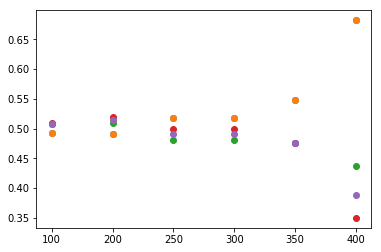

In [126]:
plt.plot(coor_x,coor_y['ERR'],'o',linewidth=2.0)
#plt.plot(coor_x,coor_y['und'],'o')
#plt.plot(coor_x,coor_y['over'],'o')
#plt.plot(coor_x,coor_y['sub'],'o')
plt.plot(coor_x,coor_y['precis'],'o')
plt.plot(coor_x,coor_y['recal'],'o')
plt.plot(coor_x,coor_y['F'],'o')
#plt.axis([100, 400, 0 , 1])
plt.show()